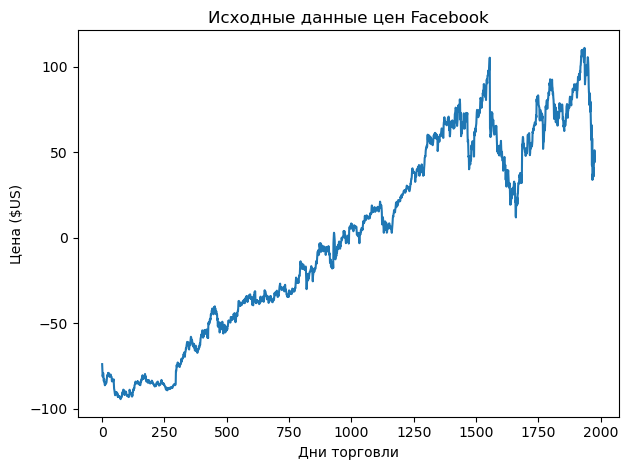

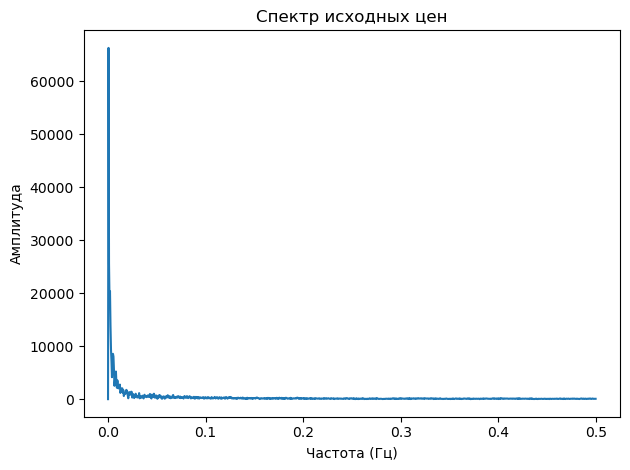

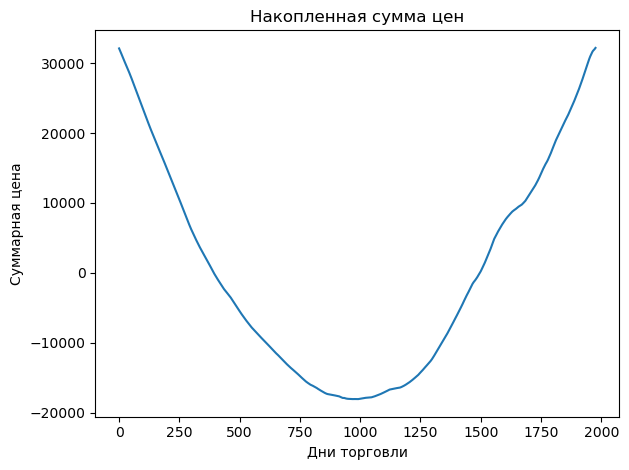

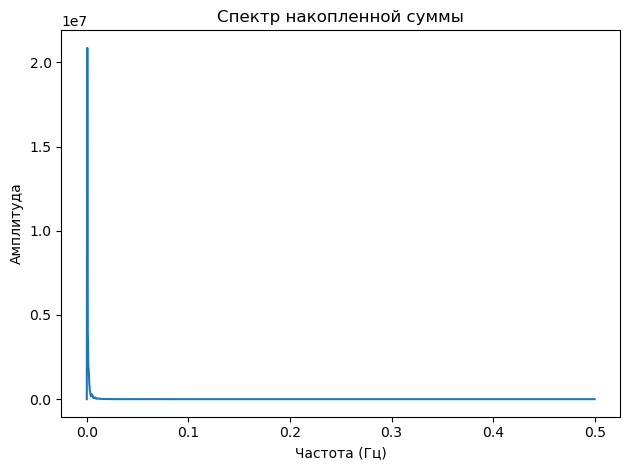

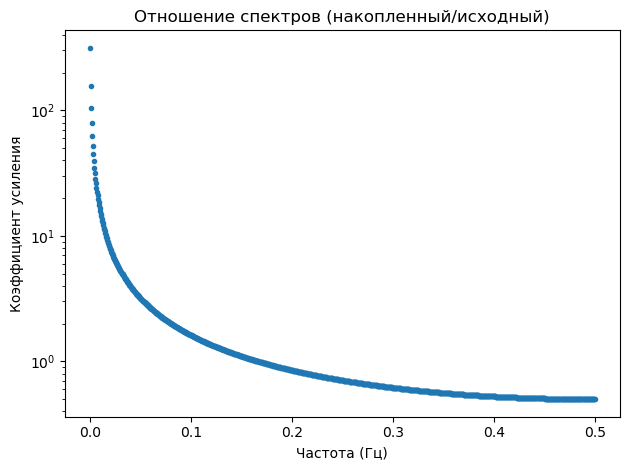

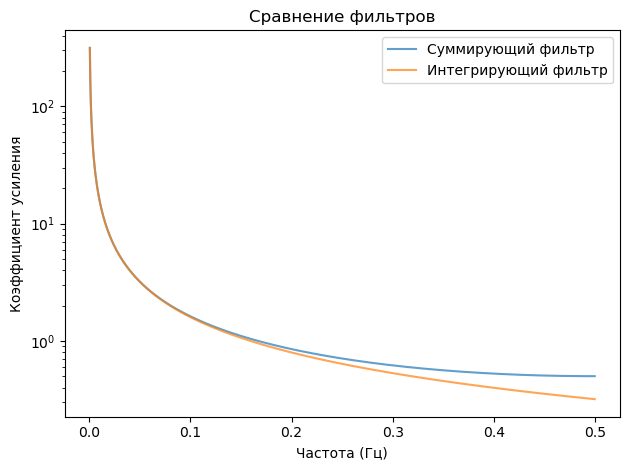

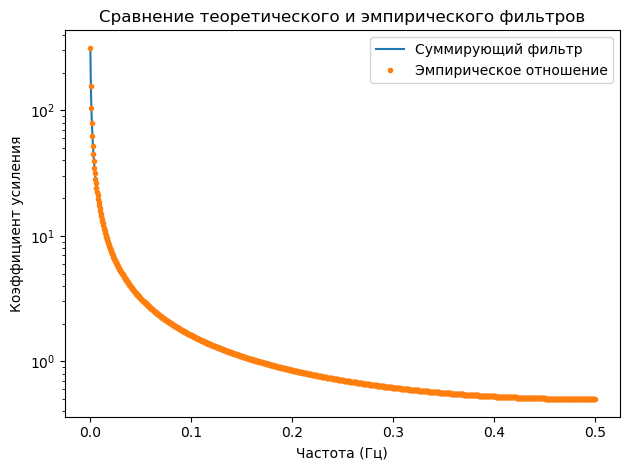

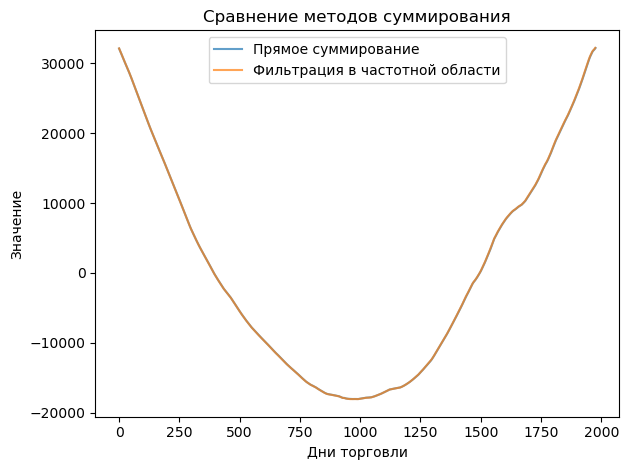

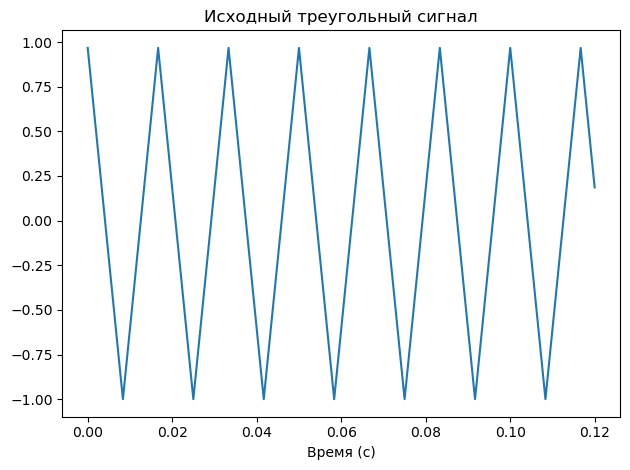

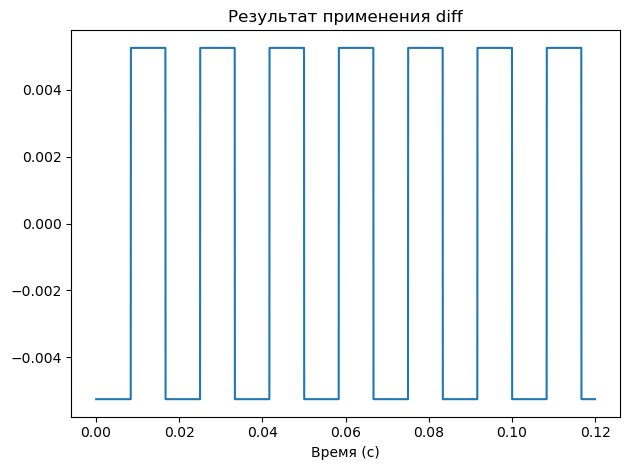

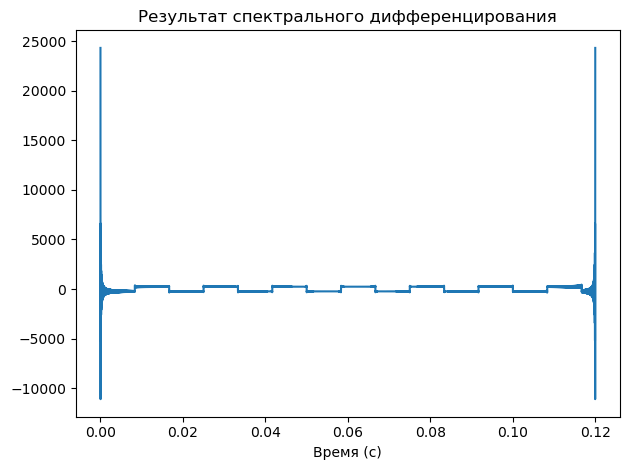

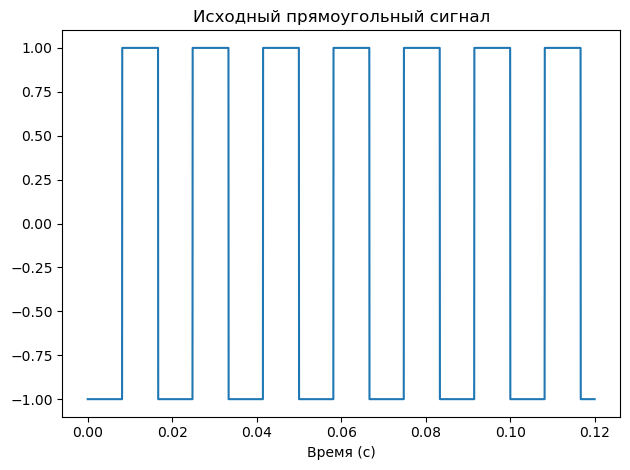

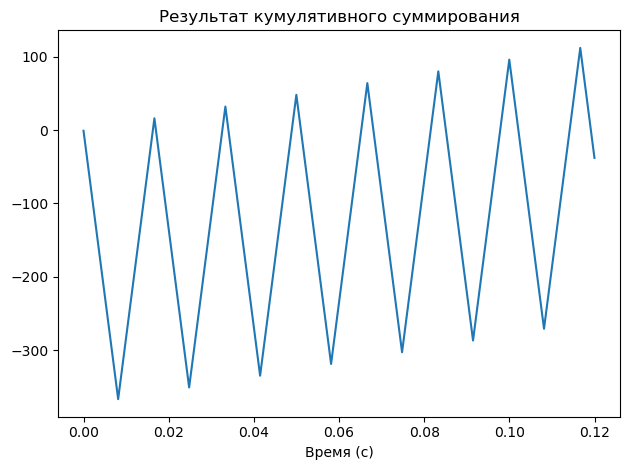

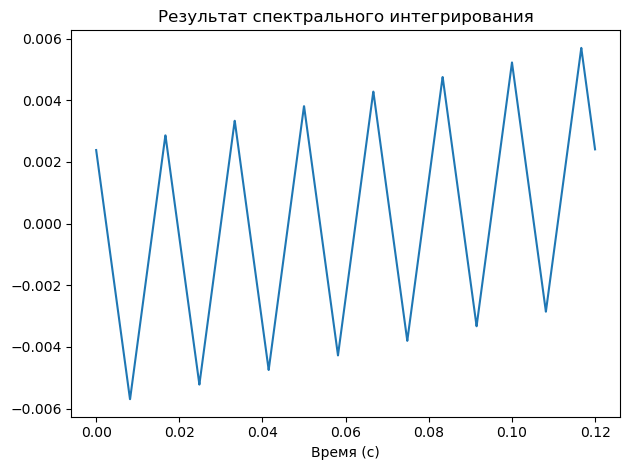

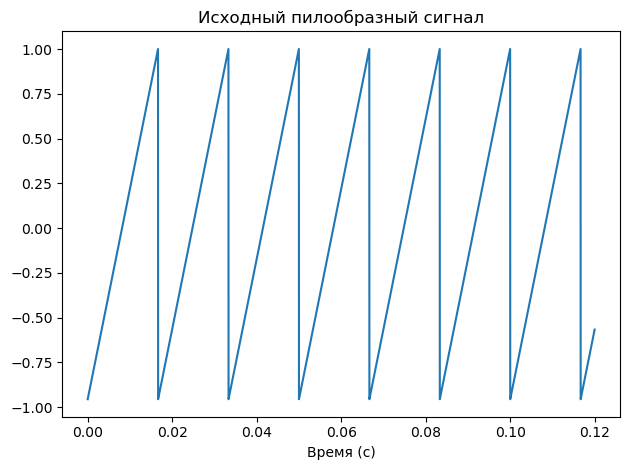

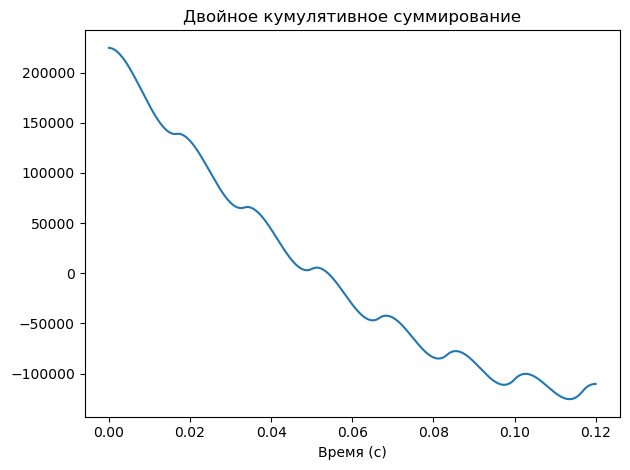

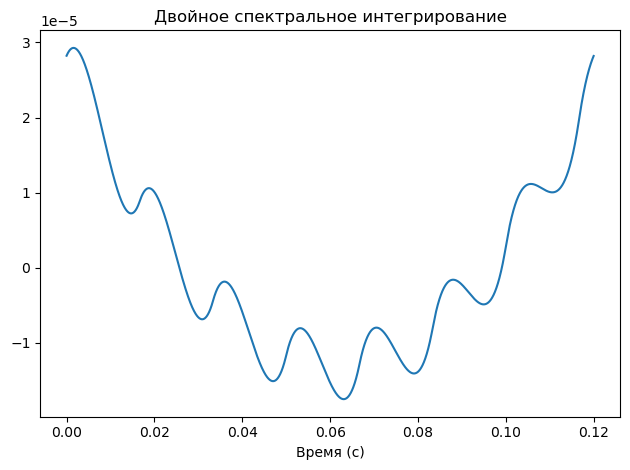

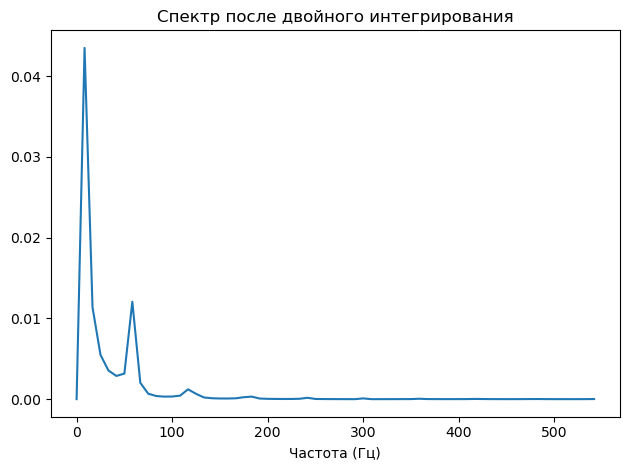

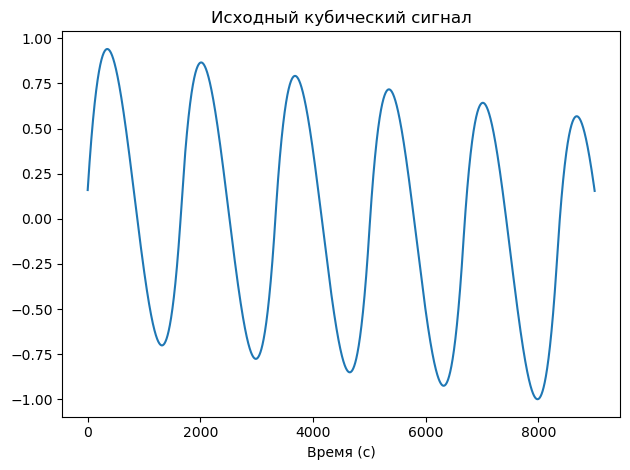

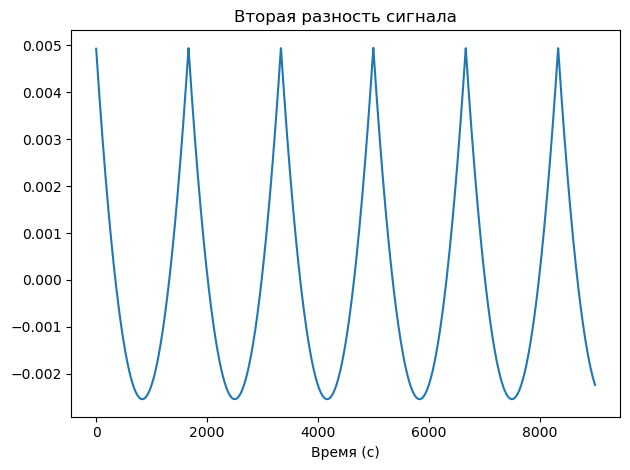

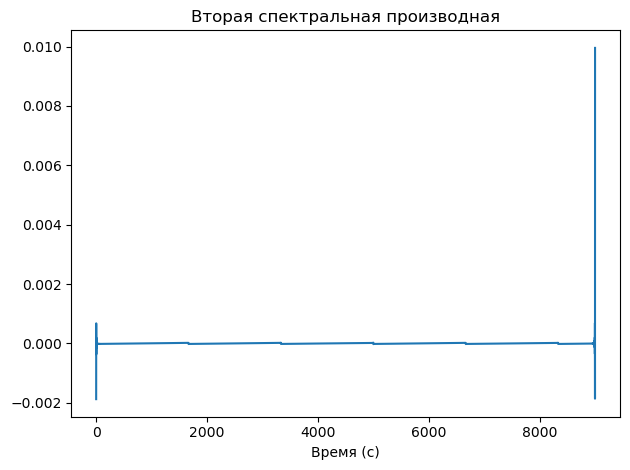

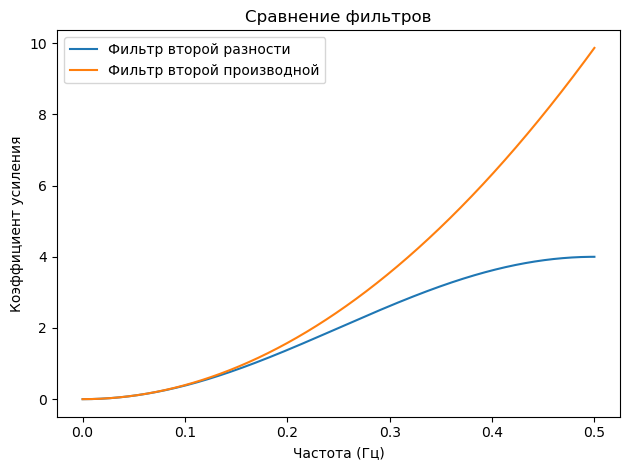

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from thinkdsp import TriangleSignal, decorate, SquareSignal, SawtoothSignal, CubicSignal, PI2, zero_pad, Wave, Spectrum

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

stock_data = pd.read_csv('FB_2.csv', header=0, parse_dates=[0])
stock_prices = stock_data['Close'].values
price_wave = Wave(stock_prices, framerate=1)
price_wave.unbias()
price_wave.plot()
plt.title("Исходные данные цен Facebook")
decorate(xlabel='Дни торговли', ylabel='Цена ($US)')
plt.show()

price_spectrum = price_wave.make_spectrum()
price_spectrum.plot()
plt.title("Спектр исходных цен")
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')
plt.show()

cumulative_wave = price_wave.cumsum()
cumulative_wave.unbias()
cumulative_wave.plot()
plt.title("Накопленная сумма цен")
decorate(xlabel='Дни торговли', ylabel='Суммарная цена')
plt.show()

cumulative_spectrum = cumulative_wave.make_spectrum()
cumulative_spectrum.plot()
plt.title("Спектр накопленной суммы")
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')
plt.show()

ratio_spectrum = cumulative_spectrum.ratio(price_spectrum, thresh=1.5)
ratio_spectrum.plot(marker='.', ms=6, ls='')
plt.title("Отношение спектров (накопленный/исходный)")
decorate(xlabel='Частота (Гц)', ylabel='Коэффициент усиления', yscale='log')
plt.show()

diff_kernel = np.array([1.0, -1.0])
padded_kernel = zero_pad(diff_kernel, len(price_wave))
diff_signal = Wave(padded_kernel, framerate=price_wave.framerate)
diff_freq = diff_signal.make_spectrum()

cumsum_freq = diff_freq.copy()
cumsum_freq.hs[1:] = 1 / cumsum_freq.hs[1:]
cumsum_freq.hs[0] = np.inf

integ_freq = cumsum_freq.copy()
integ_freq.hs[1:] = integ_freq.framerate / (PI2 * 1j * integ_freq.fs[1:])
integ_freq.hs[0] = np.inf

cumsum_freq.plot(label='Суммирующий фильтр', alpha=0.7)
integ_freq.plot(label='Интегрирующий фильтр', alpha=0.7)
plt.title("Сравнение фильтров")
decorate(xlabel='Частота (Гц)', ylabel='Коэффициент усиления', yscale='log')
plt.legend()
plt.show()

cumsum_freq.plot(label='Суммирующий фильтр')
ratio_spectrum.plot(label='Эмпирическое отношение', marker='.', ms=6, ls='')
plt.title("Сравнение теоретического и эмпирического фильтров")
decorate(xlabel='Частота (Гц)', ylabel='Коэффициент усиления', yscale='log')
plt.legend()
plt.show()

cumulative_wave.plot(label='Прямое суммирование', alpha=0.7)
cumsum_freq.hs[0] = 0
filtered_wave = (price_spectrum * cumsum_freq).make_wave()
filtered_wave.plot(label='Фильтрация в частотной области', alpha=0.7)
plt.title("Сравнение методов суммирования")
decorate(xlabel='Дни торговли', ylabel='Значение')
plt.legend()
plt.show()

triangle_gen = TriangleSignal(freq=60)
triangle_wave = triangle_gen.make_wave(duration=0.12, framerate=45000)
triangle_wave.plot()
plt.title("Исходный треугольный сигнал")
decorate(xlabel='Время (с)')
plt.show()

diff_triangle = triangle_wave.diff()
diff_triangle.plot()
plt.title("Результат применения diff")
decorate(xlabel='Время (с)')
plt.show()

triangle_spec = triangle_wave.make_spectrum().differentiate().make_wave()
triangle_spec.plot()
plt.title("Результат спектрального дифференцирования")
decorate(xlabel='Время (с)')
plt.show()

square_gen = SquareSignal(freq=60)
square_wave = square_gen.make_wave(duration=0.12, framerate=45000)
square_wave.plot()
plt.title("Исходный прямоугольный сигнал")
decorate(xlabel='Время (с)')
plt.show()

cumsum_square = square_wave.cumsum()
cumsum_square.plot()
plt.title("Результат кумулятивного суммирования")
decorate(xlabel='Время (с)')
plt.show()

square_spec = square_wave.make_spectrum().integrate()
square_spec.hs[0] = 0
integ_square = square_spec.make_wave()
integ_square.plot()
plt.title("Результат спектрального интегрирования")
decorate(xlabel='Время (с)')
plt.show()

cumsum_square.unbias()
cumsum_square.normalize()
integ_square.normalize()
cumsum_square.max_diff(integ_square)

saw_gen = SawtoothSignal(freq=60)
saw_wave = saw_gen.make_wave(duration=0.12, framerate=45000)
saw_wave.plot()
plt.title("Исходный пилообразный сигнал")
decorate(xlabel='Время (с)')
plt.show()

double_cumsum_saw = saw_wave.cumsum().cumsum()
double_cumsum_saw.unbias()
double_cumsum_saw.plot()
plt.title("Двойное кумулятивное суммирование")
decorate(xlabel='Время (с)')
plt.show()

saw_spec = saw_wave.make_spectrum().integrate().integrate()
saw_spec.hs[0] = 0
double_integ_saw = saw_spec.make_wave()
double_integ_saw.plot()
plt.title("Двойное спектральное интегрирование")
decorate(xlabel='Время (с)')
plt.show()

double_integ_saw.make_spectrum().plot(high=550)
plt.title("Спектр после двойного интегрирования")
decorate(xlabel='Частота (Гц)')
plt.show()

cubic_gen = CubicSignal(freq=0.0006)
cubic_wave = cubic_gen.make_wave(duration=9000, framerate=1)
cubic_wave.plot()
plt.title("Исходный кубический сигнал")
decorate(xlabel='Время (с)')
plt.show()

second_diff_cubic = cubic_wave.diff()
second_diff_cubic.plot()
plt.title("Вторая разность сигнала")
decorate(xlabel='Время (с)')
plt.show()

cubic_spec = cubic_wave.make_spectrum().differentiate().differentiate()
second_deriv_cubic = cubic_spec.make_wave()
second_deriv_cubic.plot()
plt.title("Вторая спектральная производная")
decorate(xlabel='Время (с)')
plt.show()

diff_filter_coeffs = np.array([-1.0, 2.0, -1.0])
padded_coeffs = zero_pad(diff_filter_coeffs, len(cubic_wave))
diff_filter_wave = Wave(padded_coeffs, framerate=cubic_wave.framerate)
diff_filter_freq = diff_filter_wave.make_spectrum()

deriv_filter_freq = cubic_wave.make_spectrum()
deriv_filter_freq.hs = (PI2 * 1j * deriv_filter_freq.fs)**2
diff_filter_freq.plot(label='Фильтр второй разности')
deriv_filter_freq.plot(label='Фильтр второй производной')
plt.title("Сравнение фильтров")
decorate(xlabel='Частота (Гц)', ylabel='Коэффициент усиления')
plt.legend()
plt.show()